<a href="https://colab.research.google.com/github/conormooney98/Applied-Predictive-Analytics/blob/main/KNN_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN model

##Import the libraries

In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing

##Import the dataset

In [2]:
df_main=pd.read_csv("NBAdata5new.csv")

In [3]:
# To use sklearn we have to convert the dataframe into a numpy array
df_main['TEAM'] = df_main['TEAM'].astype('category')
df_main['enc_Team'] = df_main['TEAM'].cat.codes
X=df_main.drop(labels=['WL','TEAM','Date', '+/-', 'FTM', '3PA', 'PF', 'FTM', '3PM', 'OREB'], axis=1).values
y=df_main['WL'].values

# Normalization

In [4]:
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))

# Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=5)
print("Train Set:",X_train.shape, y_train.shape)
print("Test Set:",X_test.shape, y_test.shape)

Train Set: (400, 15) (400,)
Test Set: (100, 15) (100,)


# Modelling (KNN with sklearn)


In [6]:
# Importing the library
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [7]:
#Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

K_max=50
mean_acc=np.zeros((K_max-1))
std_acc=np.zeros((K_max-1))
cv = KFold(n_splits=5, random_state=1, shuffle=True)

#change 'distance' to 'uniform'
weights='distance'
#weights='uniform'

mean_acc=np.zeros((K_max-1))
std_acc=np.zeros((K_max-1))
ConfustionMx=[];
for n in range(1, K_max):
    classifier = KNeighborsClassifier(n_neighbors=n, weights=weights).fit(X_train,y_train)
    scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    mean_acc[n-1]= mean(scores)
    std_acc[n-1]= std(scores)

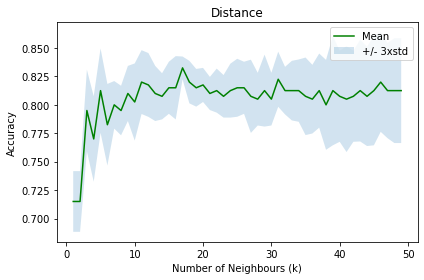

In [8]:
#Lets visualize what we have done
plt.plot(range(1, K_max),mean_acc,'g')
plt.fill_between(range(1, K_max),mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.2)
plt.title('Distance')
#plt.title('Uniform')
plt.legend(('Mean', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbours (k)')
plt.tight_layout()
plt.show()

In [9]:
# Best accuracy for validation set
print("The best accuracy was with", mean_acc.max(), "with k =",mean_acc.argmax()+1)

The best accuracy was with 0.8325000000000001 with k = 17


In [10]:
# Accuracy for on test set using best k value and weights on validation set
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
classifier = KNeighborsClassifier(n_neighbors=17, weights=weights).fit(X_train,y_train)
yhat = classifier.predict(X_test)

cm = confusion_matrix(y_test, yhat)
print(cm)

auc = accuracy_score(y_test, yhat)
precision=precision_score(y_test, yhat)
recall=recall_score(y_test, yhat)
f1= f1_score(y_test, yhat)

print("Accuracy :", round(auc,2)) 
print("Precision :", round(precision,2))
print("Recall :", round(recall,2))
print("F1 :", round(f1,2))

[[40  9]
 [17 34]]
Accuracy : 0.74
Precision : 0.79
Recall : 0.67
F1 : 0.72


### Confusion Matrix

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.0f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[34 17]
 [ 9 40]]


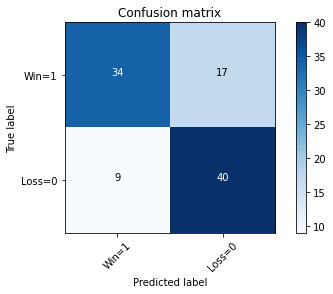

In [12]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Win=1','Loss=0'],  title='Confusion matrix')